In [2]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Performed on 10 features
df = pd.read_csv("../Data/indian_liver_patient_clean.csv")
df['Dataset'] = df['Dataset'].replace(2, 0)
X = df.drop(columns='Dataset')
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=64,
    stratify=y
)

              precision    recall  f1-score   support

  No disease       0.46      0.52      0.49        33
     Disease       0.77      0.73      0.75        75

    accuracy                           0.67       108
   macro avg       0.62      0.62      0.62       108
weighted avg       0.68      0.67      0.67       108



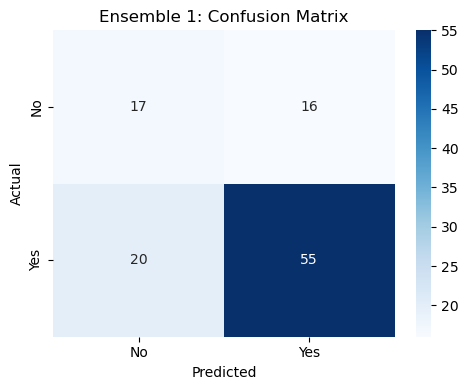

In [4]:
with open("../Models/1. Soft Voting Liver Ensemble (Default LR, Tuned RF, Tuned XGBoost).pkl", "rb") as f:
    pipe = pickle.load(f)

feat_order = pipe.feature_names_in_
X_test = X_test[feat_order]
y_pred = pipe.predict(X_test)

print(classification_report(
    y_test, y_pred,
    target_names=['No disease', 'Disease'],
    zero_division=0
))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble 1: Confusion Matrix')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

  No disease       0.36      0.24      0.29        33
     Disease       0.71      0.81      0.76        75

    accuracy                           0.64       108
   macro avg       0.54      0.53      0.52       108
weighted avg       0.60      0.64      0.62       108



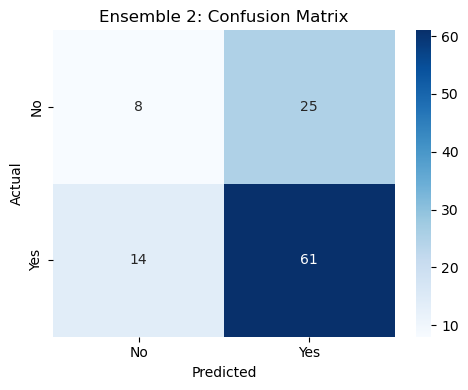

In [8]:
with open("../Models/2. Soft Voting Liver Ensemble (Default LR, Default RF, Default XGBoost).pkl",
    "rb"
) as f:
    pipe2 = pickle.load(f)

feat_order2 = pipe2.feature_names_in_
X_test2 = X_test[feat_order2]
y_pred2 = pipe2.predict(X_test2)

print(classification_report(
    y_test, y_pred2,
    target_names=['No disease', 'Disease'],
    zero_division=0
))

cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm2, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No','Yes'], yticklabels=['No','Yes']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble 2: Confusion Matrix')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

  No disease       0.39      0.27      0.32        33
     Disease       0.72      0.81      0.76        75

    accuracy                           0.65       108
   macro avg       0.55      0.54      0.54       108
weighted avg       0.62      0.65      0.63       108



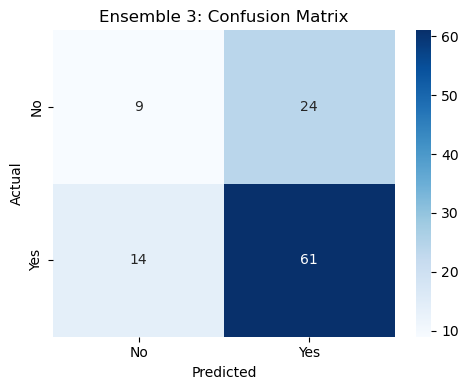

In [10]:
with open("../Models/3. Hard Voting Liver Ensemble (Default LR, Default RF, Default XGBoost).pkl",
    "rb"
) as f:
    pipe3 = pickle.load(f)

feat_order3 = pipe3.feature_names_in_
X_test3 = X_test[feat_order3]
y_pred3 = pipe3.predict(X_test3)

print(classification_report(
    y_test, y_pred3,
    target_names=['No disease', 'Disease'],
    zero_division=0
))

cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm3, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No','Yes'], yticklabels=['No','Yes']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble 3: Confusion Matrix')
plt.tight_layout()
plt.show()